# NX31 Model Project

___
DELETE BEFORE HANDIN!

Notes, and things to remember before handing in!

- notes in parentheses
- ( lav docstrings til funktionerne! )
- (import packages - erase those we do not use)
- Clear difference between numerical variables and analytical variable for math eg. n_v vs. n_a
- sæt t'er på det hele
___

# Introduction

We will examine the overlapping generations model (OLG), first the general OLG model with consumption and savings, second will expand with one extensions, as the Fully Funded (FF) method where the young generation pay a tax on their wages.
In the OLG model there is typically two generations, a generation working and a generation living on pension.
The FF model is like a state pension where the young generation pays to the current retired generation. When the young generation retires, the new young generation will pay a tax and thus fund the pensionscheme.

In [1]:
#Loads packages
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
import OLGModel

import numecon_linalg

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# The General OLG model:

As mentioned, we start with our general OLG model with just savings and consumption. This model looks as shown below.

Population growth or Labor growth:

\begin{eqnarray*}
L_t=(1+n) L_{t-1}
\end{eqnarray*}

Utility:

\begin{eqnarray*}
U_t=ln⁡(c_{1,t} )+ \frac{1}{(1+\rho)}ln⁡(c_{2,t+1} )
\end{eqnarray*}

Contraints:

\begin{eqnarray*}
ρ>-1
\end{eqnarray*}
\begin{eqnarray*}
c_{1,t}=w_t-s_t
\end{eqnarray*}
\begin{eqnarray*}
c_{2,t+1}=(1+r_{t+1} ) s_t
\end{eqnarray*}

where

- $L$ is population
- $n$ is the rate of population
- $U$ is lifetime utility
- $c_1$ is consumption as young
- $c_2$ is consumption as old
- $\rho$ is the discount rate on consumption
- $w$ is wage
- $s$ is savings
- $r$ is the interest rate

## The firm problem

The firms optimization problem will be the same in all extensions of the OLG model.

The output function is given by:

\begin{eqnarray*}
F(K_t,L_t)=Y_t=A(K_t)^\alpha(L_t)^{1-\alpha}
\end{eqnarray*}

The profit function is given by:

\begin{eqnarray*}
\Pi(K_t,L_t)=F(K_t,L_t)-w_tL_t-(r_t+\delta)K_t
\end{eqnarray*}




- $Y$ is output
- $A$ is total factor productivity (TFP)
- $K$ is capital
- $L$ is population / labor force
- $\alpha$ is the share of capital
- $\Pi$ is profit
- $w$ is wage
- $r$ is the real interest rate
- $\delta$ is the degree of depreciation


We will calculate our marginal products, r and w,  using the sympy package. We start off by defining variables as symbols.

In [2]:
# Enables sympy to write functions as math
sm.init_printing(use_unicode=True)

In [3]:
# Defines variables for sympy
K = sm.symbols('K')
L = sm.symbols('L')
A = sm.symbols('A')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
rho = sm.symbols('rho')
w = sm.symbols('w')
r = sm.symbols('r')
n = sm.symbols('n')
k = sm.symbols('k')
Pi = sm.symbols('Pi')

s = sm.symbols('s')
U = sm.symbols('U')
r_plus = sm.symbols('r_t+1')

d = sm.symbols('d')
s_payg = sm.symbols('s_payg')
w_plus = sm.symbols('w_t+1')
k_payg = sm.symbols('k_payg')

Now that the symbols are defined, we now setup the functions and solve using the sympy package.

In [4]:
# Solves the firm problem and finds r and w
Pi = A*(K**alpha)*(L**(1-alpha))-w*L-(r+delta)*K
print(Pi)
f1 = sm.diff(Pi,K)
f2 = sm.diff(Pi,L)
print(f1)
print(f2)
f1solve = sm.solve(A*K**alpha*L**(-alpha + 1)*alpha/K - delta - r, r)[0]
f2solve = sm.solve(A*K**alpha*L**(-alpha + 1)*(-alpha + 1)/L - w, w)[0]
print(f1solve)
print(f2solve)
print(f'r = (A*K**alpha*L*L**(-alpha)*alpha/K - delta)')
print(f'w = (-A*K**alpha*L**(-alpha)*(alpha - 1))')

A*K**alpha*L**(-alpha + 1) - K*(delta + r) - L*w
A*K**alpha*L**(-alpha + 1)*alpha/K - delta - r
A*K**alpha*L**(-alpha + 1)*(-alpha + 1)/L - w
A*K**alpha*L*L**(-alpha)*alpha/K - delta
-A*K**alpha*L**(-alpha)*(alpha - 1)
r = (A*K**alpha*L*L**(-alpha)*alpha/K - delta)
w = (-A*K**alpha*L**(-alpha)*(alpha - 1))


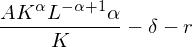

In [5]:
f1

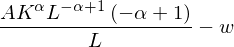

In [6]:
f2

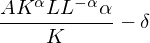

In [7]:
f1solve

In [8]:
f2solve

Now that we have the marginal products of capital and labors. We are interested in having the results giving with capital pr. capita, $k$.

The marginal products of capital (r) and labor (w) can be written as.

\begin{eqnarray*}
r_t = \alpha Ak_t^{\alpha-1}-\delta
\end{eqnarray*}

\begin{eqnarray*}
w_t = (1-\alpha) Ak_t^{\alpha}
\end{eqnarray*}

## The household problem

Next we will have to solve the household problem, by finding a expression for savings, $s$. Below we once again use the sympy package to solve the household problem and thus finds the savings rate.

In [9]:
# Solve the household problem and find s
U = sm.log(w-s)+(1/(1+rho))*sm.log((1+r_plus)*s)
U_d = sm.diff(U,s)
print(U_d)
usolve = sm.solve(-1/(-s + w) + 1/(s*(rho + 1)),s)[0]
print(usolve)
print(f's = w/(rho + 2)')

-1/(-s + w) + 1/(s*(rho + 1))
w/(rho + 2)
s = w/(rho + 2)


## Finding steady state

In order to reach a steady state for $k$, we have to setup the transitions curve for capital. Below we use the model and the results we have found, to reach an expression for steady state $k$.

The aggregated solution in the OLG model is defined as
\begin{eqnarray*}
K_{t+1}=K_t (1-δ)+S_{1,t}+S_{2,t+1}, S_{2,t+1}≡-(1-δ) K_t=0	
\end{eqnarray*}
Because there are no savings in second period and we have assumed full depreciation we get
\begin{eqnarray*}
K_{t+1}=S_{1,t}=s_t L_t
\end{eqnarray*}
Now we set up the transition curve
\begin{eqnarray*}
\frac{K_{t+1}}{L_{t+1}} =k_{t+1}=s_t  \frac{L_t}{L_{t+1}} =s_t  \frac{L_t}{(L_t (1+n) )}=\frac{s_t}{(1+n)}=\frac{w_t}{(2+ρ)}  \frac{1}{(1+n)}=\frac{(1-α)Ak_t^α}{(2+ρ)(1+n)} 
\end{eqnarray*}

Next up we solve it using sympy, and find en expression for steady state $k$

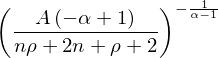

In [10]:
# Solves transition curve to find SS k
ss = sm.Eq(k,(((1-alpha)*A*(k**alpha))/((2+rho)*(1+n))))
kss = sm.solve(ss,k)[0]
kss

### Analytical solution

In [11]:
#Creates SS function for k
ss_func = sm.lambdify((alpha,n,rho,A),kss)

In [12]:
# Solves SS for k, given input
ss_func(1/3,0.02,0.04,1)

### Numerical solution

In [13]:
# Defines global values for parameters
alpha_v = 1/3
n_v = 0.02
rho_v = 0.04
A_v = 1

In [14]:
obj_kss = lambda kss: kss - ((1-alpha_v)*A_v*(kss**alpha_v))/((2+rho_v)*(1+n_v))
result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')
result

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.18135001783804428

In [15]:
print(f'Analytical solution is: {ss_func(alpha_v,n_v,rho_v,A_v):.3f}')
print(f'Numerical solution is: {result.root:.3f}')

Analytical solution is: 0.181
Numerical solution is: 0.181


## Visualization

# NOTES !

a: Guess on a k_ss, could be 1.6, or atleast lets start with that.
b: Calculate r_ss and w_ss
c: Solve the household problem
d: Calculate S (for the young)
e: k_sst (true) = s/1-n
f: Visualize your guesses


The true is the k_ss at the 45 degree line

g: k_sst-k_ss = 0

Tilbage til punkt a hvis nr. g ikke passer.

In [16]:
##a: Guess
#k_ss = 1
#delta_v=1
#r_ss = sm.symbols('r_ss')
#w_ss = sm.symbols('w_ss')
#
#def r(k,alpha,A,delta):
#    return alpha*A*k**(alpha-1)-delta
#def w(k,alpha,A):
#    return (1-alpha)*A*k**alpha
#def c1_gen(w,s):
#    return w-s
#def c2_gen(r,s):
#    return (1+r)*s
#def utility(c1,c2,rho_v):
#    rho_v>-1
#    return np.log(c1) + (1/(1+rho_v))*np.log(c2)
#
##b: Calculate r_ss and w_ss for guess
#r_ss = r(k_ss,alpha_v,A_v,delta_v)
#w_ss = w(k_ss,alpha_v,A_v)
#print('Interest Rate Steady State: ',r_ss)
#print('Wages Steady State: ',w_ss)
#
##c: Solve household problem
#s_ss = w_ss/(2+rho_v)
#
#print('Savings Steady State: ',s_ss)
#
#c1 = c1_gen(w_ss,s_ss)
#c2 = c2_gen(r_ss,s_ss)
#util = utility(c1,c2,rho_v)
#print('Consumption 1 Steady State: ', c1)
#print('Consumption 2 Steady State: ', c2)
#print('Utility Steady State: ', util)
#
#
#k_sst = ((1-alpha_v)/((2+rho_v)*(1+n_v)))**(1/(1-alpha_v))
#print(k_sst)
#
#k_ss-k_sst == 0

# PAYG OLG model

Utility...

\begin{eqnarray*}
U_t=ln⁡(c_{1,t} )+ \frac{1}{(1+\rho)}ln⁡(c_{2,t+1} )
\end{eqnarray*}

s.t.

\begin{eqnarray*}
ρ>-1
\end{eqnarray*}
\begin{eqnarray*}
c_{1,t}=w_t(1-d)-s_t
\end{eqnarray*}
\begin{eqnarray*}
c_{2,t+1}=(1+r_{t+1} ) s_t + w_{t+1}d(1+n)
\end{eqnarray*}

where

- $L$ is population
- $n$ is the rate of population
- $U$ is lifetime utility
- $c_1$ is consumption as young
- $c_2$ is consumption as old
- $\rho$ is the discount rate
- $w$ is wage
- $s$ is savings
- $r$ is the interest rate

In [17]:
# Solve the household problem and find s
U_payg = sm.log(w*(1-d)-s_payg)+(1/(1+rho))*sm.log((1+r_plus)*s_payg+w_plus*d*(1+n))
U_d_payg = sm.diff(U_payg,s_payg)
print(U_d_payg)
usolve_payg = sm.solve((r_plus + 1)/((rho + 1)*(d*w_plus*(n + 1) + s_payg*(r_plus + 1))) - 1/(-s_payg + w*(-d + 1)),s_payg)[0]
print(usolve_payg)
print(f's = (1/(2+rho))*(w*(1-d)-w_plus*d*(((1+rho)*(1+n))/(1+r_plus)))')

(r_t+1 + 1)/((rho + 1)*(d*w_t+1*(n + 1) + s_payg*(r_t+1 + 1))) - 1/(-s_payg + w*(-d + 1))
(-d*n*rho*w_t+1 - d*n*w_t+1 - d*r_t+1*w - d*rho*w_t+1 - d*w - d*w_t+1 + r_t+1*w + w)/(r_t+1*rho + 2*r_t+1 + rho + 2)
s = (1/(2+rho))*(w*(1-d)-w_plus*d*(((1+rho)*(1+n))/(1+r_plus)))


Now we set up the transition curve
\begin{eqnarray*}
\frac{K_{t+1}}{L_{t+1}} =k_{t+1}=s_t  \frac{L_t}{L_{t+1}} =s_t  \frac{L_t}{(L_t (1+n) )}=\frac{s_t}{(1+n)}=\frac{1}{(1+n)(2+\rho)}(w_t(1-d)-w_{t+1}d \frac{(1+\rho)(1+n)}{1+r_{t+1}}) = \frac{1}{(1+n)(2+\rho)}((1-\alpha)Ak_t^\alpha(1-d)-(1-\alpha)Ak_{t+1}^\alpha d \frac{(1+\rho)(1+n)}{1+\alpha Ak_{t+1}^{\alpha-1}-\delta})
\end{eqnarray*}

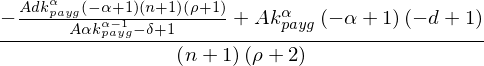

In [18]:
((1/((1+n)*(2+rho)))*((1-alpha)*A*(k_payg**alpha)*(1-d)-(1-alpha)*A*(k_payg**alpha)*d*(((1+rho)*(1+n))/(1+alpha*A*(k_payg**(alpha - 1))-delta))))

The next part does not work. :( 

In [19]:
## Solves transition curve to find SS k
#ss_payg = sm.Eq(k_payg, ((1/((1+n)*(2+rho)))*((1-alpha)*A*(k_payg**alpha)*(1-d)-(1-alpha)*A*(k_payg**alpha)*d*(((1+rho)*(1+n))/(1+alpha*A*(k_payg**(alpha - 1))-delta)))))
#kss_payg = sm.solve(ss_payg,k_payg)[0]
#kss_payg

## Analytical

In [21]:
##Creates SS function for k
#ss_func_payg = sm.lambdify((alpha,n,rho,A,delta,d),kss_payg)

In [26]:
def kss_payg2(alpha,n,rho,A,delta,d):
    return ((alpha*(1-alpha)*(1-d))/((1+n)*(2+rho)*alpha+(1+n)*(1-alpha)*d*(1+rho)))**(1/(1-alpha))

In [27]:
# Solves SS for k, given input
kss_payg2(1/3,0.02,0.04,1,1,0.12)

## Numerical

In [24]:
# Defines global values for parameters
alpha_v = 1/3
n_v = 0.02
rho_v = 0.04
A_v = 1
delta_v = 1
d_v = 0.12

In [34]:
#obj_kss_payg = lambda kss_payg2: k_payg - ((1/((1+n_v)*(2+rho_v)))*((1-alpha_v)*A_v*(k_payg**alpha_v)*(1-d_v)-(1-alpha_v)*A_v*(k_payg**alpha_v)*d_v*(((1+rho_v)*(1+n_v))/(1+alpha_v*A_v*(k_payg**(alpha_v - 1))-delta_v))))
result_payg = optimize.root_scalar(lambda x: x - kss_payg2(alpha_v,n_v,rho_v,A_v,delta_v,d_v),bracket=[0.1,100],method='brentq')
result_payg

      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 2
           root: 0.1259062929956192

In [35]:
print(f'Analytical solution is: {kss_payg2(alpha_v,n_v,rho_v,A_v,delta_v,d_v):.3f}')
print(f'Numerical solution is: {result_payg.root:.3f}')

Analytical solution is: 0.126
Numerical solution is: 0.126


# FF model

Utility...

\begin{eqnarray*}
U_t=ln⁡(c_{1,t} )+ \frac{1}{(1+\rho)}ln⁡(c_{2,t+1} )
\end{eqnarray*}

s.t.

\begin{eqnarray*}
ρ>-1
\end{eqnarray*}
\begin{eqnarray*}
c_{1,t}=w_t(1-\tau)-s_t
\end{eqnarray*}
\begin{eqnarray*}
c_{2,t+1}=(1+r_{t+1} ) s_t + \tau(1+r_{t+1})w_t
\end{eqnarray*}

where

- $L$ is population
- $n$ is the rate of population
- $U$ is lifetime utility
- $c_1$ is consumption as young
- $c_2$ is consumption as old
- $\rho$ is the discount rate
- $w$ is wage
- $s$ is savings
- $r$ is the interest rate

### functions 

In [ ]:
#def c1_ff(w,s,tau):
#    return w(1-tau)-s
#
#def c2_ff(r,s,tau,w):
#    return (1+r)*s+tau*(1+r)*w
#
#tau = 0.13

In [ ]:
#def c1_gen(w,s):
#    return w-s
#
#def c2_gen(r,s):
#    return (1+r)*s
#
#def utility(c1,c2,rho):
#    rho>-1
#    return np.log(c1)+(1/(1+rho))*np.log(c2)

In [ ]:
#def c1_payg(w,s,d):
#    return w(1-d)-s
#
#def c2_payg(r,s,w,d,n):
#    return (1+r)*s+wd(1+n)
#
##d = 0.12

In [ ]:
#def output(K,L,alpha,A):
#    return A*(K**alpha)*(L**(1 - alpha))
#def profit(output,w,L,r,K,delta=1):
#    return output-w*L-(r+delta)*K

In [ ]:
##Solving the general model gives:
#def r_payg(k,alpha,A,delta):
#    return alpha*A*k**(alpha-1)-delta
#def w_payg(k,alpha,A):
#    return (1-alpha)*A*k**alpha